In [6]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample
import numpy as np
from impulse.pta_utils import initial_sample, setup_sampler
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time
from la_forge import core, diagnostics

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [8]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [9]:
sampler = setup_sampler(pta, ret_chain=True, resume=False, num_samples=5e6, ntemps=4, ncores=1, outdir='/pta_test')

2022-07-26 12:02:33.903 | INFO     | impulse.pta_utils:setup_sampler:1111 - Adding red noise prior draws...

2022-07-26 12:02:33.903 | INFO     | impulse.pta_utils:setup_sampler:1146 - Adding GWB uniform distribution draws...



In [10]:
chain = sampler.sample()

  0%|          | 0/5000 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
  0%|          | 1/5000 [00:02<4:08:12,  2.98s/it]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
  0%|          | 2/5000 [00:04<3:02:20,  2.19s/it]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
100%|██████████| 5000/5000 [1:08:32<00:00,  1.22it/s]


In [26]:
chains = []
for i in range(4):
    with open('./chains/chain_{}.txt'.format(i + 1), 'r') as f:
        chain = np.loadtxt(f)
    chains.append(chain)

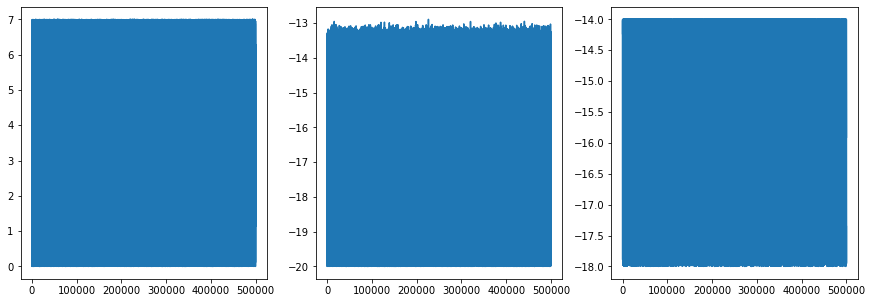

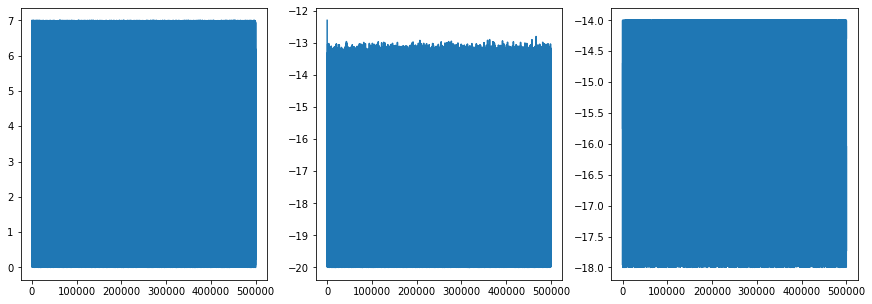

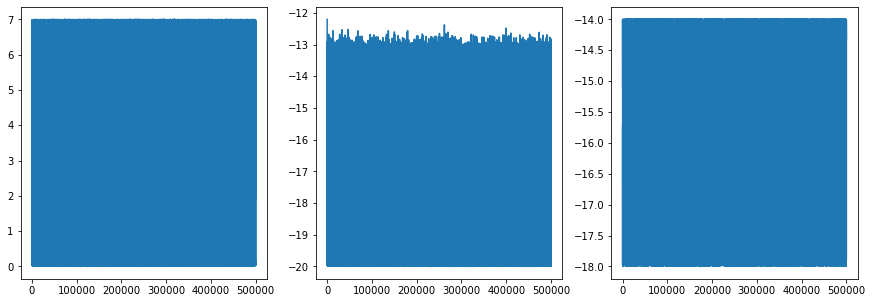

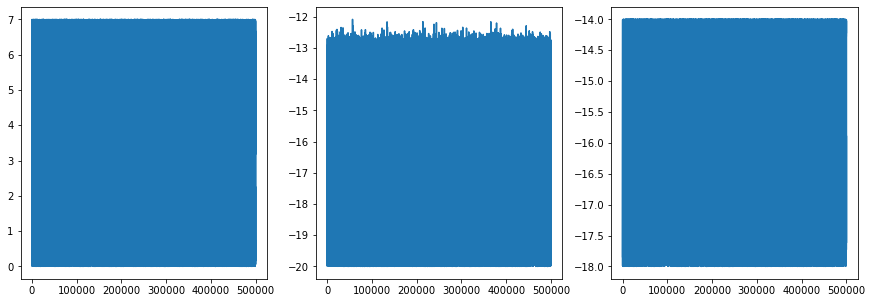

In [28]:
for ii in range(4):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chains[ii][:, 0])
    ax[1].plot(chains[ii][:, 1])
    ax[2].plot(chains[ii][:, 2])
    plt.show()

In [29]:
x0 = np.hstack([p.sample() for p in pta.params])
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [30]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50)

Finished 0.10 percent in 0.270614 s Acceptance rate = 0.966

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.190793 s Acceptance rate = 0.328356Adding DE jump with weight 50
Finished 99.90 percent in 185.672892 s Acceptance rate = 0.207881
Run Complete


In [31]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

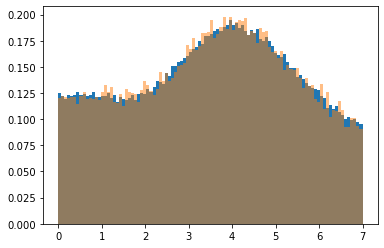

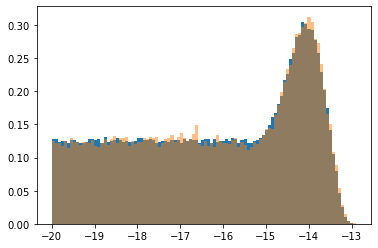

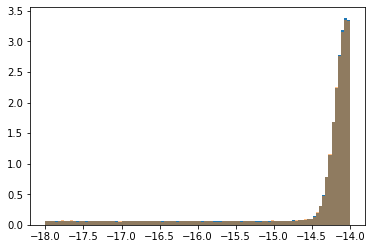

In [33]:
for ii in range(3):
    __, bins, __ = plt.hist(chains[0][20_000:, ii], bins=100, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [43]:
ii = 2
print(integrated_time(chains[0][20000:, ii]))
print(integrated_time(chain2[20_000:, ii]))

[6.14664725]
[25.52532053]
